In [1]:
!pip install gensim==4.3.3 numpy==1.24.3

In [3]:
import gensim.downloader as api
# import numpy as np
# Load pre-trained GloVe embeddings (100d)
word_vectors = api.load('glove-wiki-gigaword-100') # ~130MB
print(f"Vocabulary size: {len(word_vectors.index_to_key)}")
# King - Man + Woman = ?
result = word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)
for word, similarity in result:
 print(f"{word}: {similarity:.4f}")
# Similar words to "computer"
print(word_vectors.most_similar('computer', topn=5))
# Odd one out
print(word_vectors.doesnt_match("breakfast lunch dinner banana".split()))
# Word similarity
print(word_vectors.similarity('king', 'queen'))


Vocabulary size: 400000
queen: 0.7699
monarch: 0.6843
throne: 0.6756
daughter: 0.6595
princess: 0.6521
[('computers', 0.8751984238624573), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175)]
banana
0.7507691


2nd

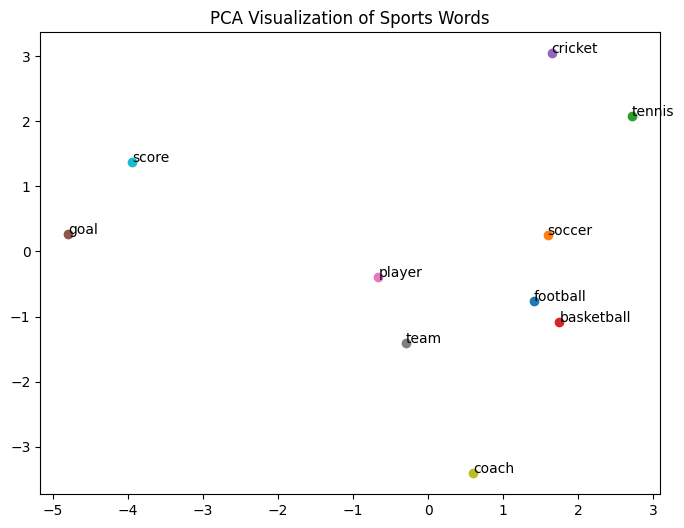

woman: 0.8323
boy: 0.7915
one: 0.7789
person: 0.7527
another: 0.7522


In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import gensim.downloader as api

word_vectors = api.load('glove-wiki-gigaword-100') # ~130MB
# Sports words
sports_words = ['football', 'soccer', 'tennis', 'basketball', 'cricket', 'goal', 'player', 'team', 'coach',
'score']
sports_vectors = np.array([word_vectors[word] for word in sports_words])
# PCA Visualization
pca = PCA(n_components=2)
sports_2d = pca.fit_transform(sports_vectors)
plt.figure(figsize=(8,6))
for i, word in enumerate(sports_words):
  plt.scatter(sports_2d[i,0], sports_2d[i,1])
  plt.annotate(word, (sports_2d[i,0], sports_2d[i,1]))
plt.title("PCA Visualization of Sports Words")
plt.show()

# to get 5 semantically similar words
# Load pre-trained GloVe embeddings (100d)

result=word_vectors.most_similar("man",topn=5 )
for word, similarity in result:
 print(f"{word}: {similarity:.4f}")


3rd program

In [11]:
from gensim.models import Word2Vec

medical_data = [
 ["patient", "doctor", "nurse", "hospital", "treatment"],
 ["cancer", "chemotherapy", "radiation", "surgery", "recovery"],
 ["infection", "antibiotics", "diagnosis", "disease", "virus"],
 ["heart", "disease", "surgery", "cardiology", "recovery"] ]

model = Word2Vec(sentences=medical_data, vector_size=10, window=2,
min_count=1, workers=1, epochs=50)

input_word = "patient"
if input_word in model.wv:
 similar_words = model.wv.most_similar(input_word, topn=3)
 print(f"3 words similar to '{input_word}':")
 for word, similarity in similar_words:
  print(f"{word} (similarity: {similarity:.2f})")
else:
 print(f"'{input_word}' is not in the vocabulary.")

3 words similar to 'patient':
nurse (similarity: 0.59)
doctor (similarity: 0.34)
chemotherapy (similarity: 0.29)


4th

In [17]:
# Step 1: Pre-defined dictionary of words and their similar terms (static word
word_embeddings = {
 "ai": ["machine learning", "deep learning", "data science"],
 "data": ["information", "dataset", "analytics"],
 "science": ["research", "experiment", "technology"],
 "learning": ["education", "training", "knowledge"],
 "robot": ["automation", "machine", "mechanism"]
}
# Step 2: Function to find similar words using the static dictionary
def find_similar_words(word):
 if word in word_embeddings:
  return word_embeddings[word]
 else:
  return []
# Step 3: Function to enrich a prompt with similar words
def enrich_prompt(prompt):
 words = prompt.lower().split()
 enriched_words = []
 for word in words:
  similar_words = find_similar_words(word)
  if similar_words:
    enriched_words.append(f"{word} ({', '.join(similar_words)})")
  else:
    enriched_words.append(word)

 return " ".join(enriched_words)

# Step 4: Original prompt
original_prompt = "Explain AI and its applications in science."
# Step 5: Enrich the prompt using similar words
enriched_prompt = enrich_prompt(original_prompt)
# Step 6: Print the original and enriched prompts
print("Original Prompt:")
print(original_prompt)
print("\nEnriched Prompt:")
print(enriched_prompt)


Original Prompt:
Explain AI and its applications in science.

Enriched Prompt:
explain ai (machine learning, deep learning, data science) and its applications in science.


5th

In [20]:
# Step 1: Pre-defined dictionary of words and their similar terms
word_embeddings = {
 "adventure": ["journey", "exploration", "quest"],
 "robot": ["machine", "automation", "mechanism"],
 "forest": ["woods", "jungle", "wilderness"],
 "ocean": ["sea", "waves", "depths"],
 "magic": ["spell", "wizardry", "enchantment"]
}
# Step 2: Function to get similar words for a seed word
def get_similar_words(seed_word):
 if seed_word in word_embeddings:
  return word_embeddings[seed_word]
 else:
  return ["No similar words found"]
# Step 3: Function to create a short paragraph using the seed word and similar words
def create_paragraph(seed_word):
  similar_words = get_similar_words(seed_word)
  if "No similar words found" in similar_words:
    return f"Sorry, I couldn't find similar words for '{seed_word}'."
# Construct a short story using the seed word and similar words
  paragraph = (
  f"Once upon a time, there was a great {seed_word}. "
  f"It was full of {', '.join(similar_words[:-1])}, and {similar_words[-1]}. "
  f"Everyone who experienced this {seed_word} always remembered it as a remarkable tale."
  )

  return paragraph
# Step 4: Input a seed word
seed_word = "adventure" # You can change this to "robot", "forest", "ocean", "magic", etc.
# Step 5: Generate and print the paragraph
story = create_paragraph(seed_word)
print("Generated Paragraph:")
print(story)


Generated Paragraph:
Once upon a time, there was a great adventure. It was full of journey, exploration, and quest. Everyone who experienced this adventure always remembered it as a remarkable tale.
